In [1]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE,Isomap,MDS
from sklearn.decomposition import PCA,KernelPCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from collections import Counter
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.svm import SVC,OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import MinMaxScaler
from xgboost import *
import plotly
import plotly.express as px
try:
    import researchpy as rp
except:
    !pip install researchpy
    import researchpy as rp

# extract

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 


In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


# data preprocessing

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


6 nulls were present
- replace nulls with mode

In [6]:
X = X.fillna(X.mode().iloc[0])

In [7]:
y = y>0

In [8]:
y

,num
0,False
1,True
2,True
3,False
4,False
...,...
298,True
299,True
300,True
301,True


In [9]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [11]:
scaler = MinMaxScaler()
tsne = TSNE()
tsne_pipeline = Pipeline([('scaler',scaler),('tsne',tsne)])
X_transformed = tsne_pipeline.fit_transform(X)

In [12]:
xax,yax = X_transformed[:,0], X_transformed[:,1]

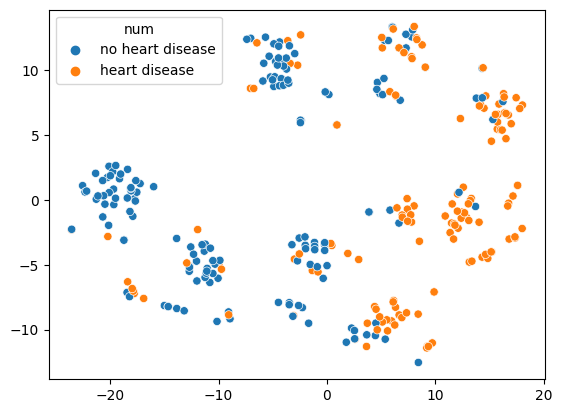

In [13]:
sns.scatterplot(x=xax,y=yax,hue = y.applymap(lambda x: "heart disease" if x else "no heart disease").num)
plt.show()

In [14]:
ec = EllipticEnvelope()
sc = MinMaxScaler()

outliersPipeline = Pipeline([("scaling",sc),("ellipticEnvelope",ec)])
X_out= outliersPipeline.fit_predict(X)


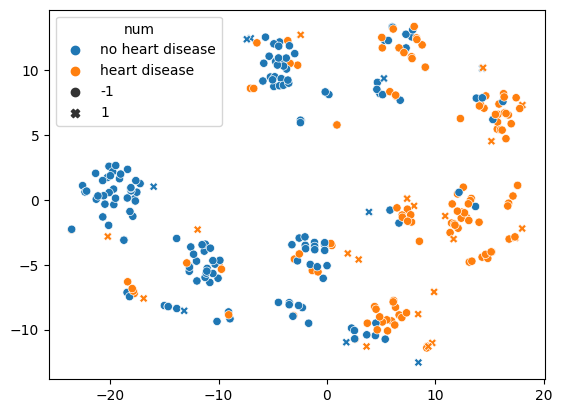

In [15]:
sns.scatterplot(x=xax,y=yax,style = -1*X_out,hue = y.applymap(lambda x: "heart disease" if x else "no heart disease").num)
plt.show()

In [16]:
X['outlier']  = X_out

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outlier
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,-1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,-1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [18]:
copy = X.copy(deep=True)
copy['target'] = y
copy.iloc[np.argwhere(X_out == -1).reshape(-1)].reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outlier,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,-1,True
1,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,-1,False
2,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,-1,True
3,64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,-1,False
4,66,0,1,150,226,0,0,114,0,2.6,3,0.0,3.0,-1,False
5,40,1,1,140,199,0,0,178,1,1.4,1,0.0,7.0,-1,False
6,51,1,1,125,213,0,2,125,1,1.4,1,1.0,3.0,-1,False
7,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,-1,True
8,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,-1,True
9,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,-1,True


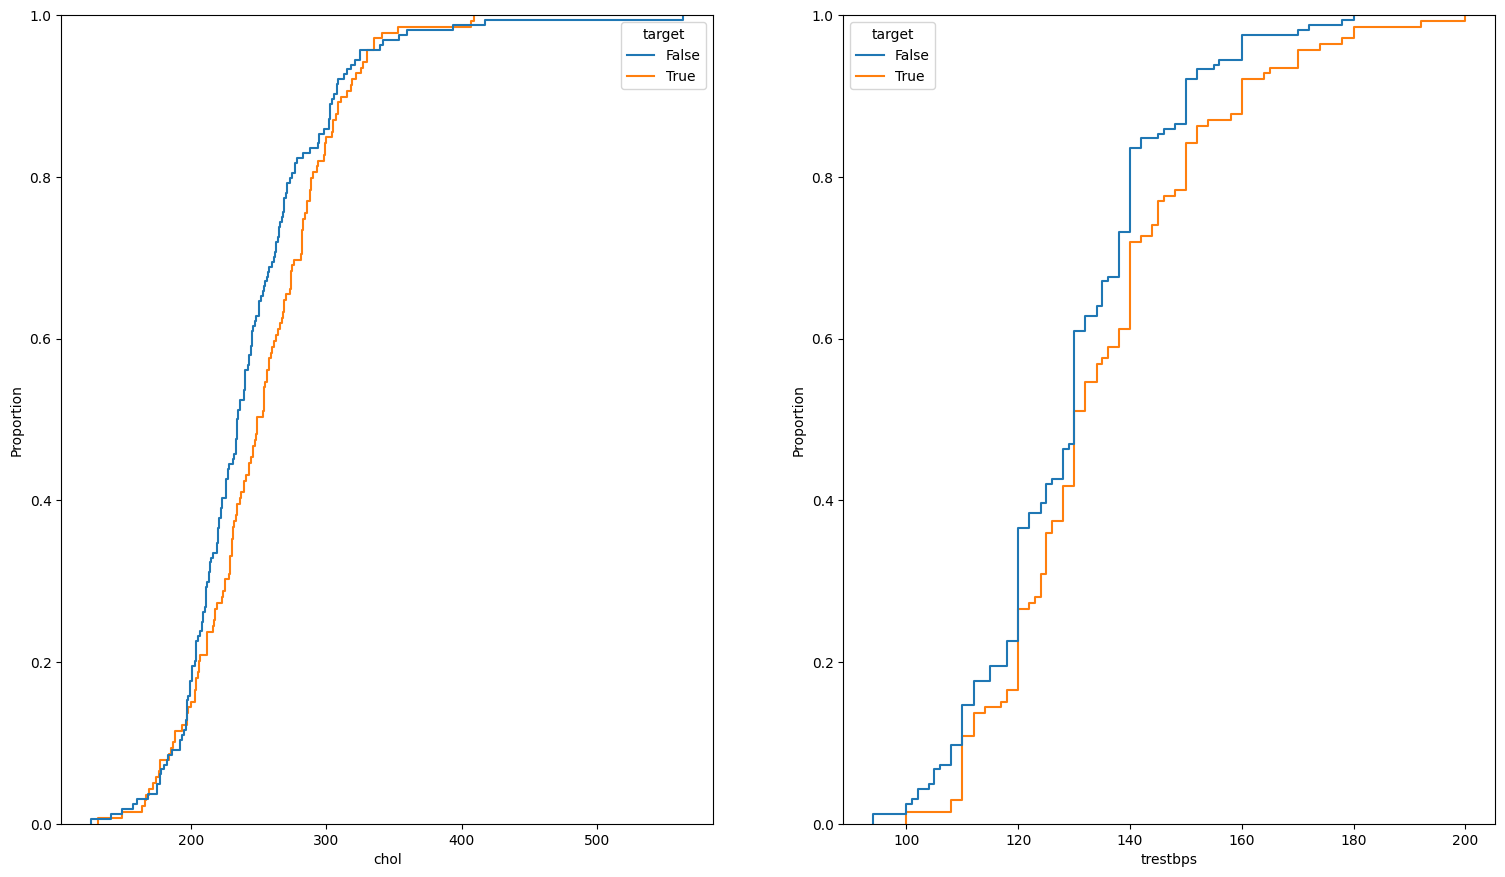

In [19]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5, forward=True)
sns.ecdfplot(data = copy , x = 'chol',hue = 'target',ax=ax[0])
sns.ecdfplot(data = copy, x = 'trestbps',hue = 'target',ax=ax[1])
fig.show()

In [20]:
copy['gender'] = copy.sex.apply(lambda x: "Male" if x==1 else 'Female')
copy.groupby('gender',as_index=False).mean()[['gender','chol']]

,gender,chol
0,Female,261.752577
1,Male,239.601942


In [21]:
_,ageGroups = np.histogram(copy.age.values,bins=8)
a1 = ageGroups.repeat(2)[0::2][:-1]
a2 = ageGroups.repeat(2)[2::2]
print(a1,a2,sep="\n")
groups = np.char.add(np.char.add(a1.astype(str)," - "),a2.astype(str))
idxs = np.digitize(copy.age,ageGroups) 
idxs[idxs.argmax()]= 8
copy['age Groups'] = groups[idxs -1]

[29. 35. 41. 47. 53. 59. 65. 71.]
[35. 41. 47. 53. 59. 65. 71. 77.]


In [22]:
y_reps = y.applymap(lambda x: "heart disease" if x else "no heart disease").num

In [23]:
copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outlier,target,gender,age Groups
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,1,False,Male,59.0 - 65.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,-1,True,Male,65.0 - 71.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,True,Male,65.0 - 71.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,-1,False,Male,35.0 - 41.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,1,False,Female,41.0 - 47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,True,Male,41.0 - 47.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,True,Male,65.0 - 71.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,True,Male,53.0 - 59.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,True,Female,53.0 - 59.0


In [24]:
copy.pivot_table(index ='age Groups',columns= 'gender',values='chol',aggfunc=['mean','count'])

mean              count     
gender           Female        Male Female Male
age Groups                                     
29.0 - 35.0  210.000000  193.000000      1    2
35.0 - 41.0  204.250000  223.363636      4   11
41.0 - 47.0  227.562500  239.444444     16   36
47.0 - 53.0  262.909091  234.184211     11   38
53.0 - 59.0  273.960000  241.870370     25   54
59.0 - 65.0  273.130435  242.024390     23   41
65.0 - 71.0  293.083333  248.173913     12   23
71.0 - 77.0  236.400000  304.000000      5    1

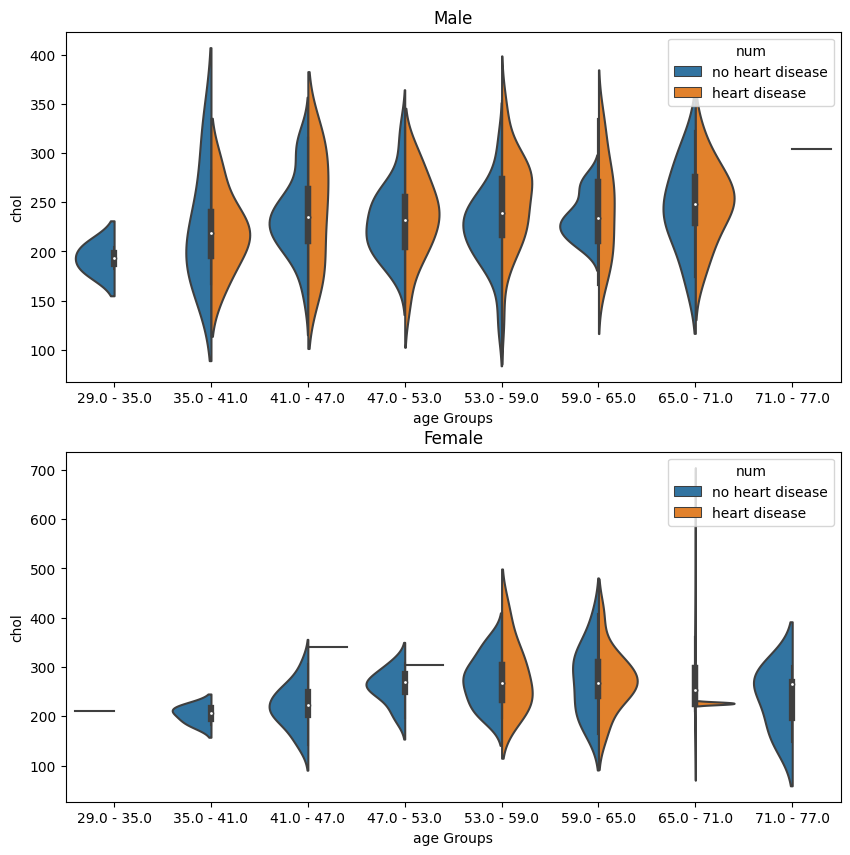

In [25]:
fig,ax = plt.subplots(nrows = 2)
ax[0].set_title("Male")
sns.violinplot(copy[copy['gender'] == 'Male'], x = 'age Groups',y= 'chol',
               hue = y_reps,order = groups,split=True,ax=ax[0])
ax[1].set_title('Female')
sns.violinplot(copy[copy['gender'] == 'Female'], x = 'age Groups',y= 'chol',
               hue = y_reps,order = groups,split=True,ax=ax[1])
fig.set_size_inches(10,10)
fig.show()

<Axes: xlabel='cp', ylabel='count'>

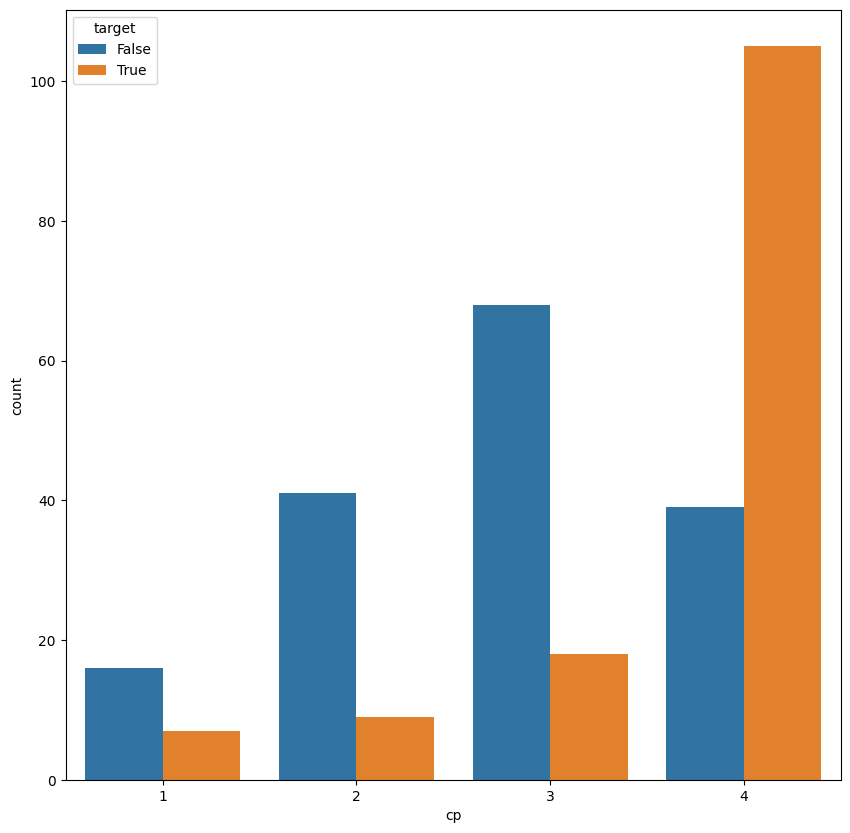

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.countplot(copy,x = 'cp',hue='target')

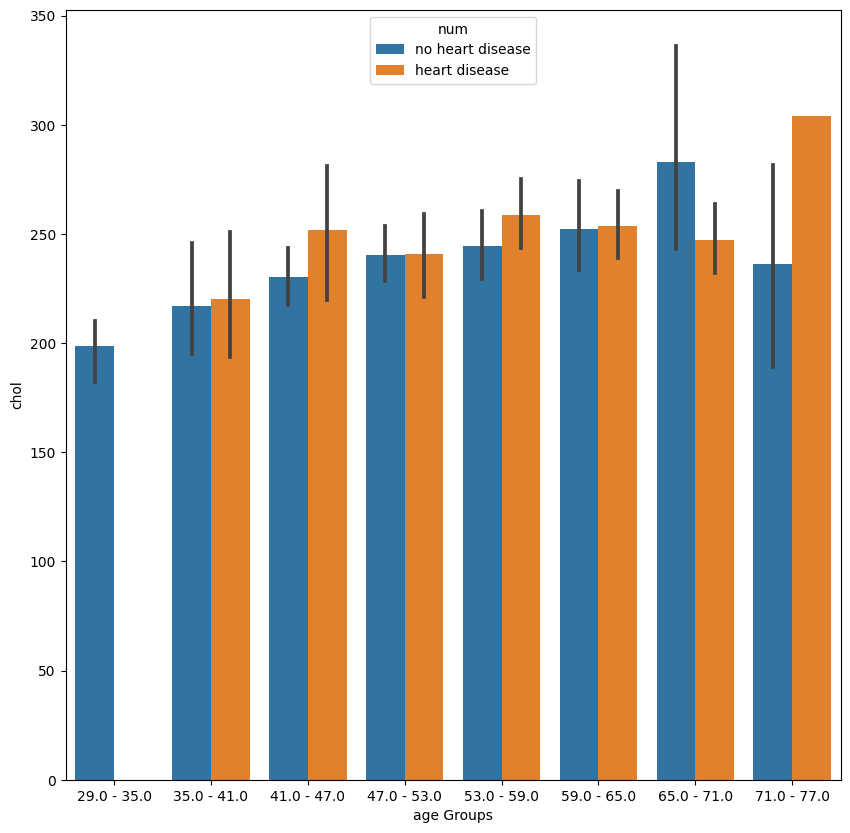

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(copy,x = 'age Groups',y = 'chol',
            hue= y_reps,
            ax=ax,order = groups)
fig.show()

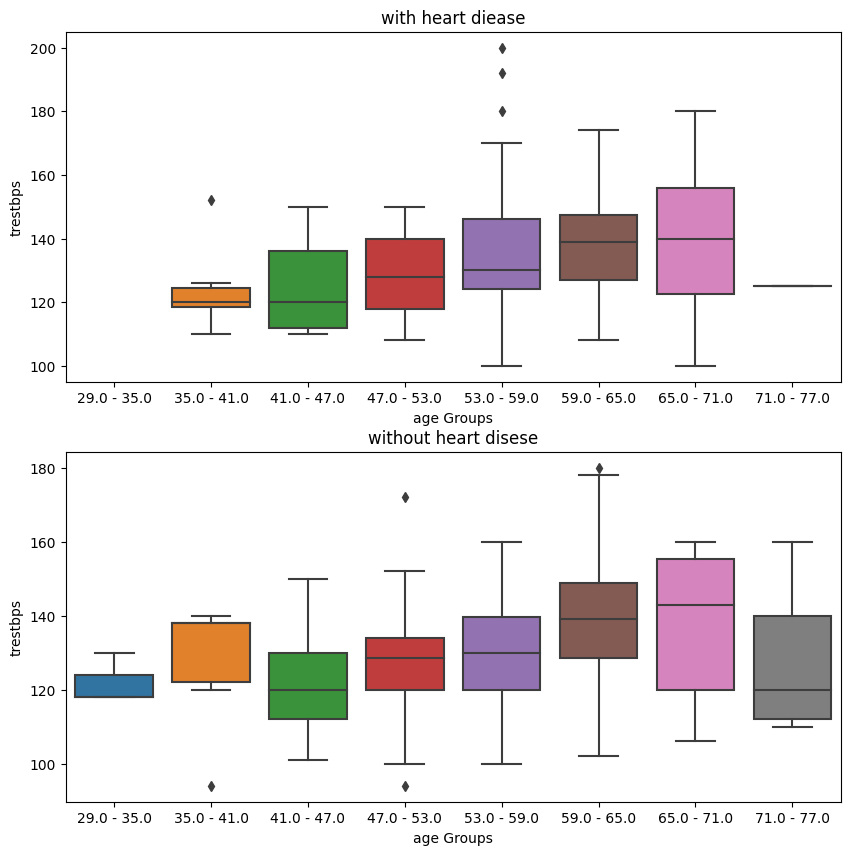

In [28]:
fig,ax = plt.subplots(nrows = 2)
ax[0].set_title("with heart diease")
sns.boxplot(copy[copy['target']], x = 'age Groups',y= 'trestbps',
               order = groups,ax=ax[0])
ax[1].set_title('without heart disese')
sns.boxplot(copy[~copy['target']], x = 'age Groups',y= 'trestbps',
               order = groups,ax=ax[1])
fig.set_size_inches(10,10)
fig.show()

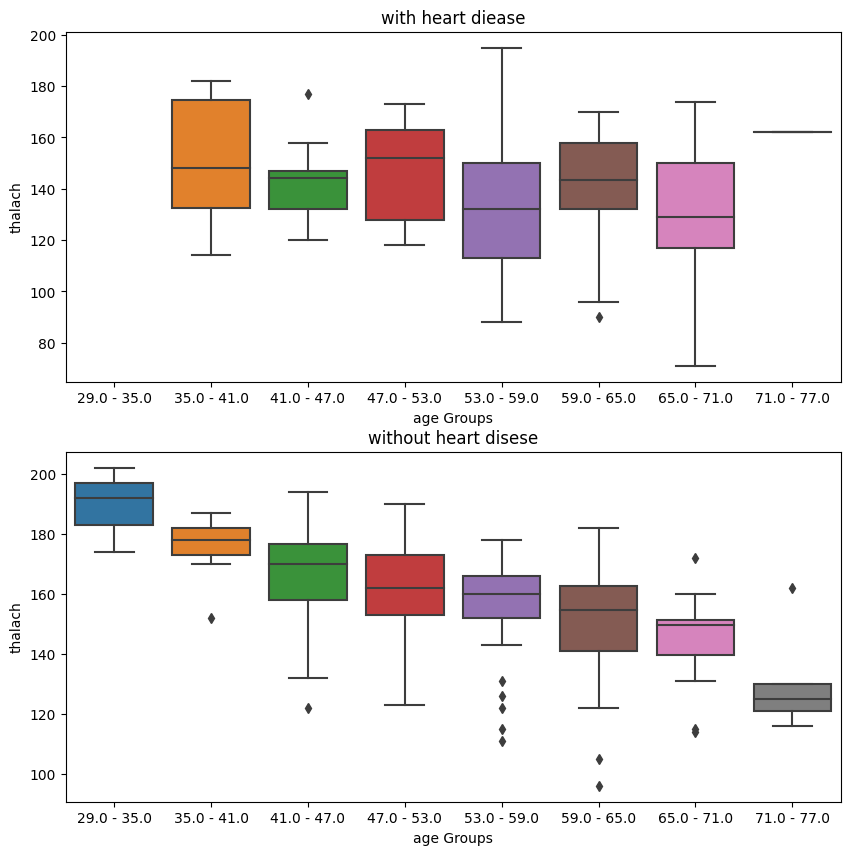

In [29]:
fig,ax = plt.subplots(nrows = 2)
ax[0].set_title("with heart diease")
sns.boxplot(copy[copy['target']], x = 'age Groups',y= 'thalach',
               order = groups,ax=ax[0])
ax[1].set_title('without heart disese')
sns.boxplot(copy[~copy['target']], x = 'age Groups',y= 'thalach',
               order = groups,ax=ax[1])
fig.set_size_inches(10,10)
fig.show()

In [30]:
X = copy.drop(["target",'age Groups','gender'],axis=1)
Y = y.applymap(lambda x:1 if x else 0).num
X_train,X_test,y_train,y_test = train_test_split(X,Y)
sc = MinMaxScaler()
pca = PCA(n_components=13)
svm = SVC()
pipe = Pipeline([("scaler",sc),
                 ("pca",pca),
                 ("svm",svm)])
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1,0.5, 1, 10],
    'svm__kernel': ['linear', 'rbf','polynomial'],
    'svm__degree':[2,3,4,5,6,7],
    'pca__n_components': [i for i in range(3,13)]
}


grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Make predictions on the test set
preds = best_model.predict(X_test)


Best Parameters:  {'pca__n_components': 8, 'svm__C': 1, 'svm__degree': 2, 'svm__kernel': 'linear'}
Best Accuracy:  0.8371541501976283


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2400 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
632 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages

In [31]:
from sklearn.metrics import classification_report
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.89      0.82      0.85        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [32]:
from xgboost import XGBClassifier
param_grid = {
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__n_estimators': [50,100, 200, 300],
    'xgb__max_depth': [3, 5, 7,11],
    'pca__n_components': [i for i in range(3,13)]
}

xgb = XGBClassifier()


pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("pca", PCA()),
    ("xgb", xgb)
])


grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)


grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
preds = best_model.predict(X_test)

Best Parameters:  {'pca__n_components': 10, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best Accuracy:  0.8233201581027668


In [33]:
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.84      0.82      0.83        38

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [34]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
#     'pca__n_components': [i for i in range(3,13)]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier()

# Create the pipeline with MinMaxScaler, PCA, and RandomForest
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
#     ("pca", PCA()),
    ("rf", rf)
])

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
preds = best_model.predict(X_test)

Best Parameters:  {'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Best Accuracy:  0.8454545454545455


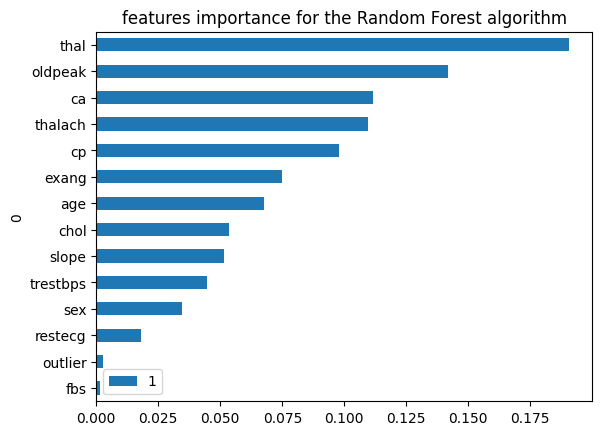

In [35]:
pd.DataFrame(zip(X_test.columns, best_model.steps[1][1].feature_importances_)).set_index(0).sort_values(by=1).plot(kind='barh',)
plt.title("features importance for the Random Forest algorithm")
plt.show()

In [36]:
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        38
           1       0.90      0.74      0.81        38

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76

